# Project Name: Predicting the Prices of used Cars using ML

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Reading the data from csv file
df=pd.read_csv("car data.csv")

In [4]:
# Viewing the top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Finding the shape of the dataset
df.shape

(301, 9)

In [6]:
# Finding the size of the dataset
df.size

2709

In [7]:
# Viewing the unique values of Categorical columns
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())
print(df['Car_Name'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Act

In [8]:
# Check Missing or Null Values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# There are no null/missing values in the dataset.

In [10]:
# Viewing the summary statistics of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Feature Engineering

In [11]:
# Viewing the columns in the dataset
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
# Creating new dataset after removing 'Car_Name', which doesn't add much value to the prediction
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
# Viewing the dataset without 'Car_Name'
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
# Creating New Feature 'Current_Year'
final_dataset['Current_Year']=2021

In [15]:
# Viewing the dataset after adding new column
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [16]:
# Adding another new column to find out age of car
final_dataset['Car_Age'] = final_dataset['Current_Year']-final_dataset['Year']

In [17]:
# Viewing the dataset after adding new column
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
# Dropping Columns 'Year' and 'Current_Year' since 'Car_Age' will be useful in the model & prediction 
final_dataset.drop(['Year'], axis=1, inplace=True)
final_dataset.drop(['Current_Year'], axis=1, inplace=True)

In [19]:
# Viewing the dataset after dropping two columns
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Getting Dummy variables for the Categorical columns

In [20]:
# Getting dummy variables & Avoiding dummy variable trap by dropping the first variable 
# (if it's one, all others will be zero) by mentioning drop_first=True 
final_dataset = pd.get_dummies (final_dataset, drop_first=True)

In [21]:
# Viewing the dataset after adding dummy variable columns
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Exploratory Data Analysis (EDA)

In [22]:
# Finding the correlation among the variables
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [27]:
# Importing seaborn library
import seaborn as sns

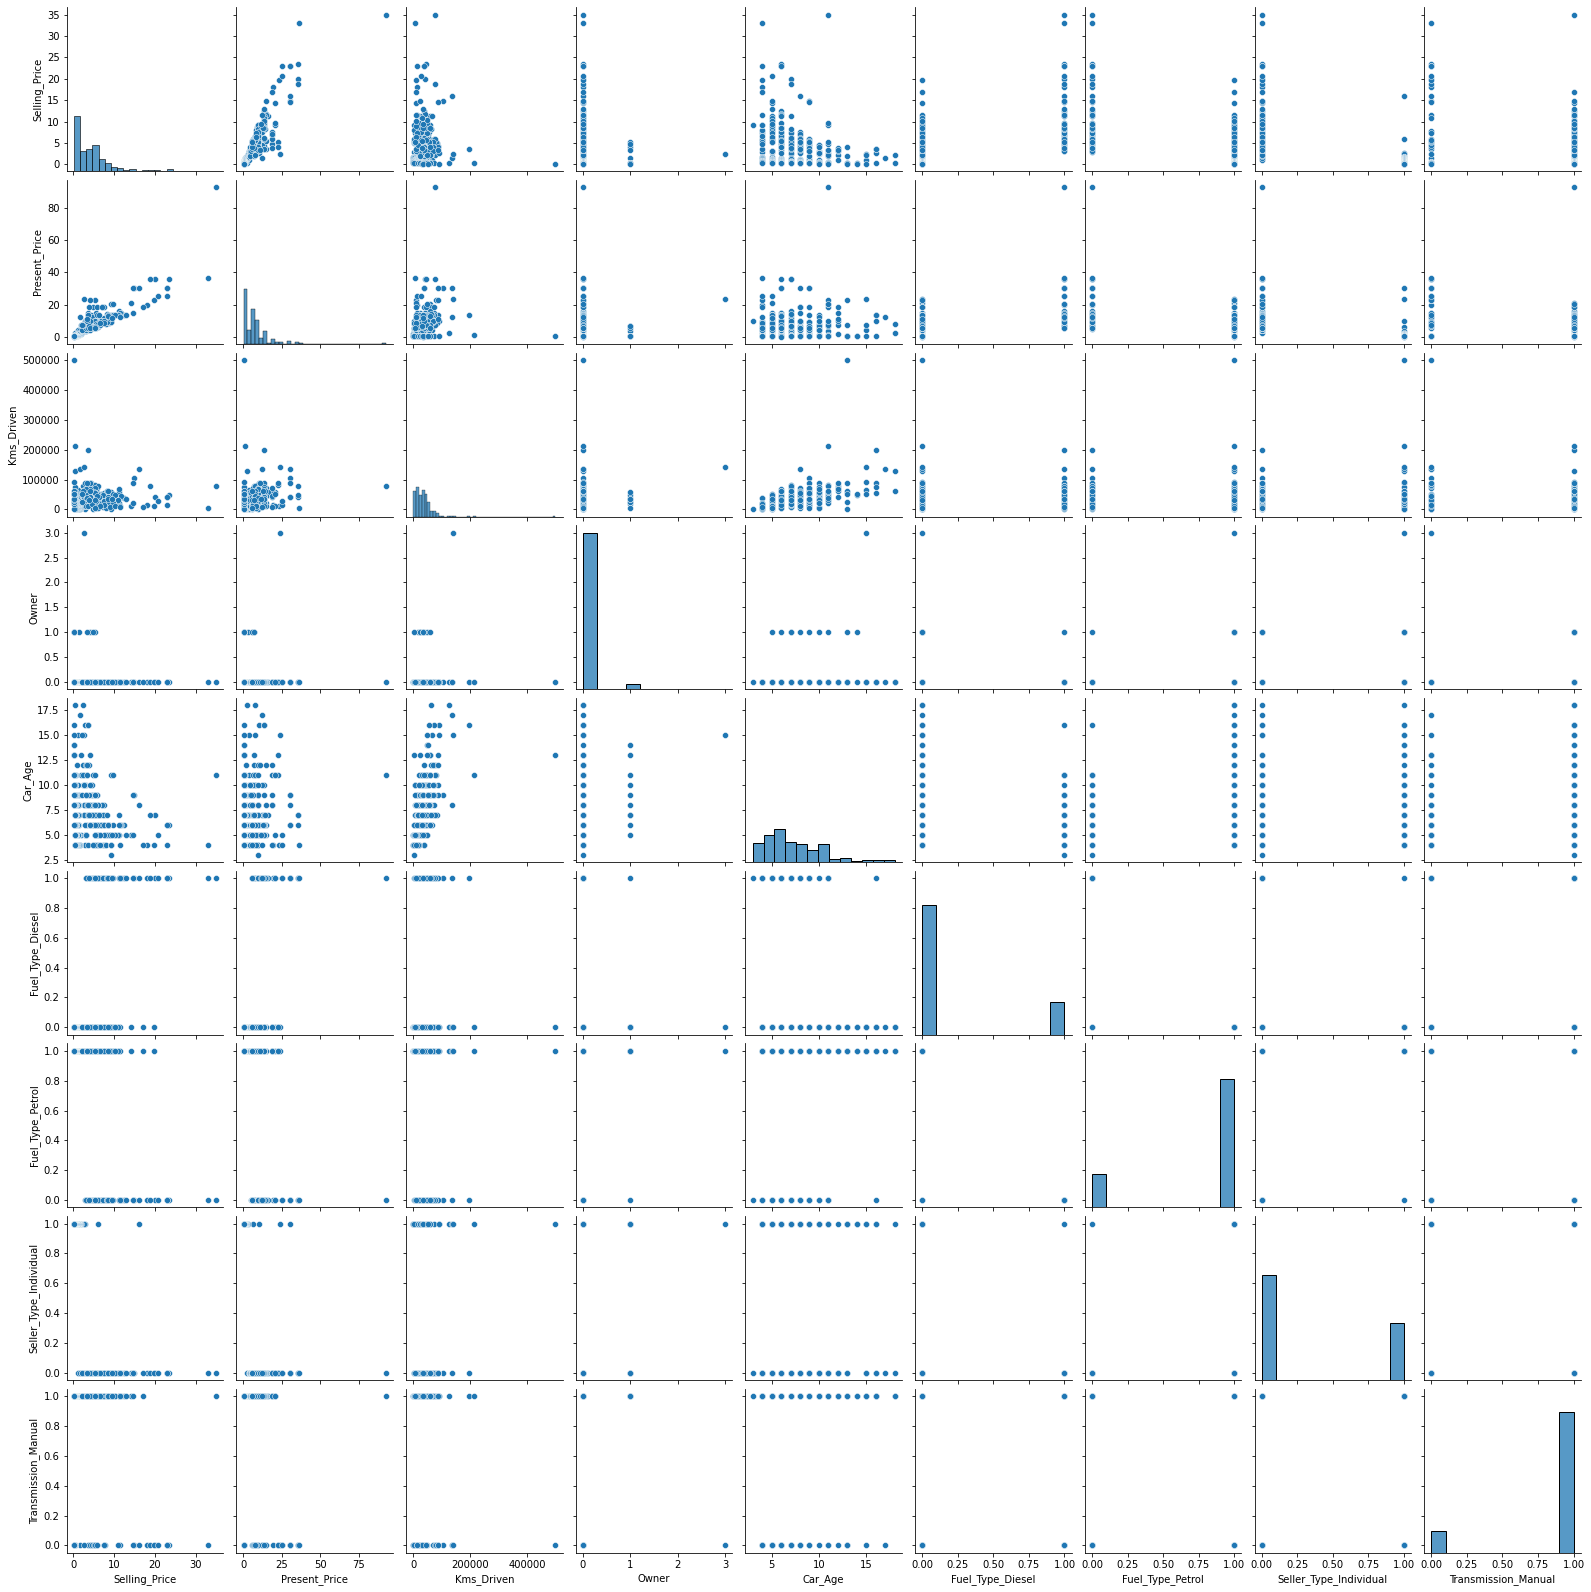

In [28]:
# Viewing the correlation of variables using seaborn pairplot
sns.pairplot(final_dataset);

In [29]:
# Importing matplotlib & making it inline
import matplotlib.pyplot as plt
%matplotlib inline

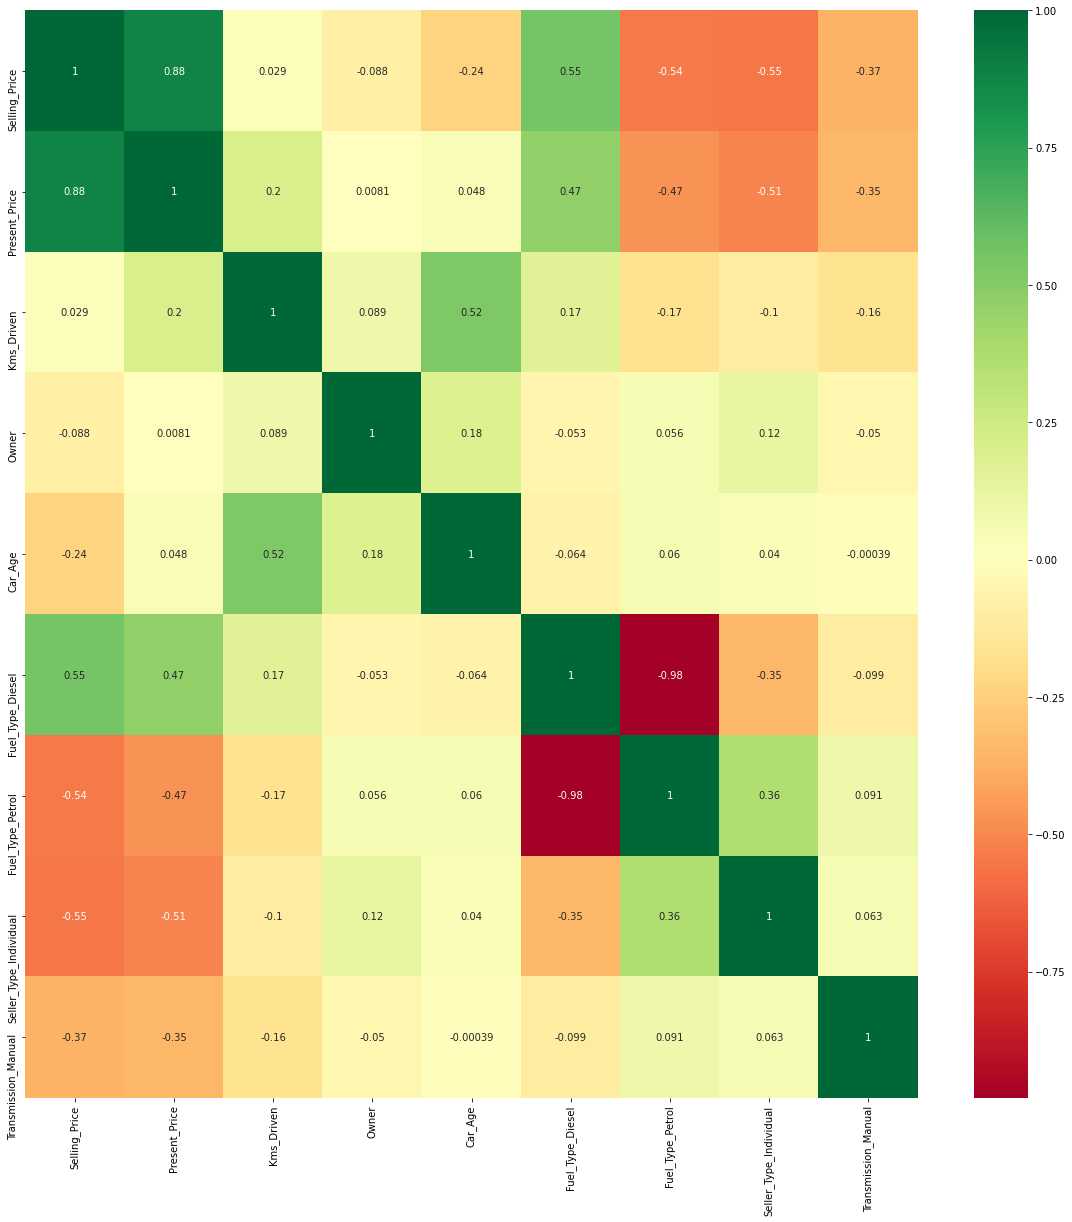

In [30]:
# Finding the top correlating features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plotting the Heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Building the Model using Random Forest

In [31]:
# Seperating Independent and Dependent Features in the dataset
X=final_dataset.iloc[:,1:] # Independent Features except Selling_Price
y=final_dataset.iloc[:,0] # Dependent Feature : Selling_Price

In [32]:
# Viewing the dataset with independent variables
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [33]:
# Viewing the dataset with dependent variable
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [34]:
# Importing ExtraTreesRegressor from sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
# Printing the Importance of various features
print(model.feature_importances_)

[0.34532179 0.0413679  0.0004133  0.07046005 0.2650444  0.00608499
 0.12230532 0.14900226]


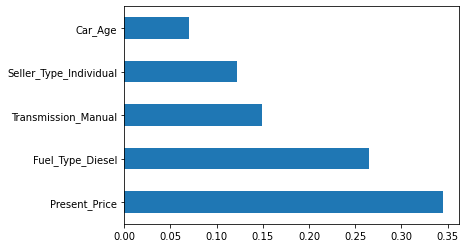

In [36]:
# Visualizing the top 5 features
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [37]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Splitting the data between train and test datasets as 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# Viewing the train dataset after splitting
X_train

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
22,8.01,50000,0,10,0,1,0,0
171,0.55,6700,0,6,0,1,1,1
56,7.27,40534,0,6,0,1,0,1
39,7.98,62000,0,18,0,1,0,1
31,4.89,54200,0,10,0,1,0,1
...,...,...,...,...,...,...,...,...
1,9.54,43000,0,8,1,0,0,1
70,6.76,71000,0,7,1,0,0,1
177,0.57,24000,0,5,0,1,1,0
209,5.70,21125,0,6,1,0,0,1


In [39]:
# Finding the shape of train dataset
X_train.shape

(240, 8)

In [40]:
# Importing Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [41]:
# Hyperparameter tuning to avoid overfitting and underfitting
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [42]:
# Importing Randomized Search CV - to select the best paramters since it's faster than GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [43]:
# Initializing the hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [46]:
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
# Applying the Random Forest model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
# Finding the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [49]:
# Finding the best score
rf_random.best_score_

-3.8928840043094572

In [50]:
# Predicting on train dataset
predictions=rf_random.predict(X_test)

In [51]:
# Viewing the predicted values
predictions

array([ 0.3707721 ,  5.50026719,  0.29179907,  5.17089602, 10.6898689 ,
        3.28584392,  5.10482461,  7.6568783 ,  7.42835368,  0.50623592,
        0.33167636,  4.57302358,  5.13317903, 16.47766975,  0.32394226,
        0.23990762,  1.14179553,  5.37987211, 20.72460459,  4.03245022,
        0.49303835,  0.33152365,  8.13478894,  5.71794798, 10.03446152,
        5.49962841,  5.778467  ,  2.83306118,  7.55127967,  5.39424697,
        4.39841448, 16.58243437, 20.24309769,  0.53064897,  3.86325676,
       10.36617053,  0.42199502,  0.67287653,  0.52487169,  1.13077794,
        5.57908175,  0.23945306, 20.84937288,  7.82465855,  5.42386553,
        2.97373708,  0.7214248 ,  2.60288654,  7.64118825,  3.57854464,
        8.12485859,  7.83611193,  1.34831288,  2.67376686,  5.53377504,
        2.85986108,  2.95044916,  1.34831288,  9.98451783,  7.07707571,
        4.62239401])

C:\Users\Venkanna\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


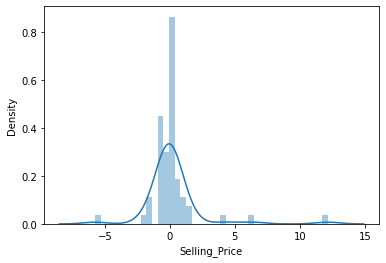

In [54]:
# Comparing the prediction values with actual/real values ('y_test') using distplot
sns.distplot(y_test-predictions);

In [55]:
# Difference between actual values('y_test') and predicted values are very minimal. 
# Hence, it's Normal/Gaussian distribution.

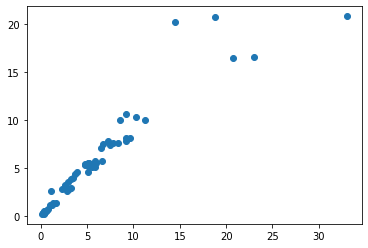

In [56]:
# Plotting Scatter plot with actual test values and predicted test values
plt.scatter(y_test,predictions);

In [57]:
# Since scatter plot is linearly available, prediction can be treated as good.

In [58]:
# Importing metrics from sklearn
from sklearn import metrics

In [59]:
# Printing the errors in the model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9123893668237494
MSE: 4.365136379872859
RMSE: 2.0892908796701475


# Pickle the file for Model Deployment

In [60]:
import pickle
# open a file, specify location to store the data
file = open('car_price_predict_rf_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [61]:
# End of Project